<a href="https://colab.research.google.com/github/muthonioprah/Hypothyroidism1-Prediction/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2022_2_Oprah_Muthoni_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothyrodism Prediction**

Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems.

Hormones produced by the thyroid gland — triiodothyronine (T3) and thyroxine (T4) — impact your health.


Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  


Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### **Metric for success**:
A model with an accuracy level greater than 85%

Dataset Link: http://bit.ly/hypothyroid_data 


## **The Metadata**

**T- True, F-False, M-Male, F-Female**

**Age** - Age 

**Sex **- M=Male or F=female

**on_thyroxine** - Whether taking thyroxine drugs

**query_on_thyroxine** - Whether taken thyroxine drugs

**on_antithyroid_medication** -Whether taking anti-thyroid drugs

**thyroid_surgery-** Whether thyroid surgery was done

**query_hypothyroid **- presence of hypothyroidism

**query_hyperthyroid**- presence of hyperthyroidism

**pregnant **- Whether pregnant

**sick** - Whether sick

**tumor** - presence of a thyroid tumor

**lithium**- Presense of lithium in drugs

**goitre** - Presence of thyroid goitre

**TSH_measured**

**TSH**

**T3_measured**

**T3**

**TT4_measured**

**TT4**

# **Data Understanding**

In [3]:
#Loading our libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Loading the Dataset
df = pd.read_csv('http://bit.ly/hypothyroid_data')

In [5]:
# Previewing the top of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [6]:
# Checking the column datatype
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [7]:
# Determining the no. of records in our dataset
df.shape

(3163, 26)

In [8]:
#checking the decription of the dataset
df.describe

<bound method NDFrame.describe of            status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
0     hypothyroid  72   M            f  ...            y   10            n   ?
1     hypothyroid  15   F            t  ...            y   17            n   ?
2     hypothyroid  24   M            f  ...            y    0            n   ?
3     hypothyroid  24   F            f  ...            y    6            n   ?
4     hypothyroid  77   M            f  ...            y   44            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3158     negative  58   F            f  ...            y   95            n   ?
3159     negative  29   F            f  ...            y   98            n   ?
3160     negative  77   M            f  ...            y  104            n   ?
3161     negative  74   F            f  ...            y  137            n   ?
3162     negative  56   F            t  ...            y  143            n   ?

[3163 rows x 26 c

In [9]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# **Data Cleaning**

In [10]:
# checking for Missing Data
df.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [11]:
# Checking for duplicate values
df.duplicated().sum()

77

In [12]:
#Dropping duplicate values
df.drop_duplicates(keep= 'first',inplace=True)

In [13]:
# replacing ? with NAN
df.replace(['?'], np.nan, inplace=True)
# Checking the changes
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


the values with '?' were replaced with NAN

In [14]:
# missing values
# drop TBG column mostof its values are missing
df_clean= df.drop('TBG', axis= 1)
print(df_clean.columns)

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')


The TBG column was dropped

In [15]:
#dropping the null values in the sex column since they were few
df_clean.dropna(subset=['sex'], inplace=True)
df_clean.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n


The null values in the sex column were dropped

In [16]:
# Before dealing with missing values in the numerical columns we will change them from object datatype 
colz = ['T3','TSH','age','TT4','T4U','FTI']
for i in colz:
  df[i] = pd.to_numeric(df[i])
df_clean.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
dtype: object

The coumns data types were changed frm object to float

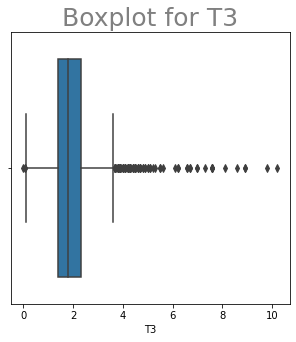

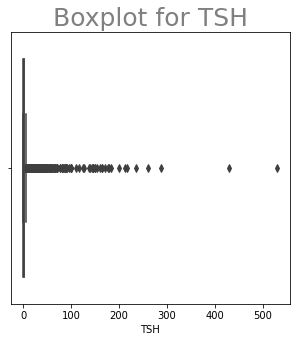

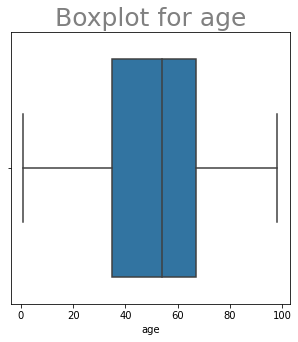

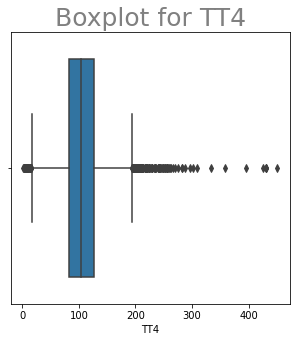

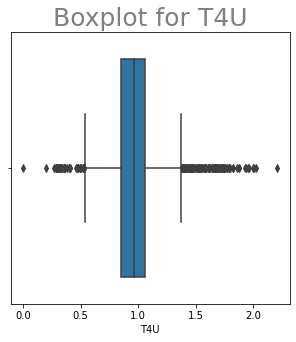

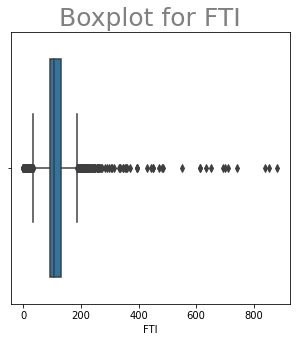

In [17]:
#check for outliers in our numerical data
for i in colz:
    fig = plt.figure(figsize = (5,5))
    sns.boxplot(df[i])
    plt.title('Boxplot for ' + i, size = 25, color = 'grey')
            
plt.show()

The columns have outliers, these shall be retained 

In [18]:
# Filling the missing values in the other numerical columns with mean
for i in colz:
    df[i]= df[i].fillna(df[i].mean())

In [19]:
# Checking for Anomalies
columns = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
for i in columns:
  print('Unique values in', i , 'are : ')
  print(df[i].unique())

Unique values in status are : 
['hypothyroid' 'negative']
Unique values in age are : 
[72.         15.         24.         77.         85.         64.
 20.         42.         69.         75.         53.         59.
 68.         50.         78.         65.         28.         43.
 40.         84.         51.11253776 83.         63.         73.
 36.         27.         48.         71.         60.         34.
 79.         62.         74.         32.         41.         70.
 29.          5.         58.         35.         51.         22.
 16.         44.         39.         47.         18.         17.
 88.         56.         30.         45.         66.         52.
 54.         80.         33.         38.         92.         67.
 46.         13.         89.         61.         49.         26.
 57.         31.         90.         81.         25.         37.
 76.         87.         23.         55.         86.         98.
 21.         97.          1.          6.         14.         82.
 11.

In [20]:
#checking for any remaning null values 
df_clean.isnull().sum()

status                         0
age                          382
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          443
T3_measured                    0
T3                           668
TT4_measured                   0
TT4                          235
T4U_measured                   0
T4U                          234
FTI_measured                   0
FTI                          233
TBG_measured                   0
dtype: int64

The dataset has no null values

# **Exploratory Data Analysis**

## **Univariate Analysis**

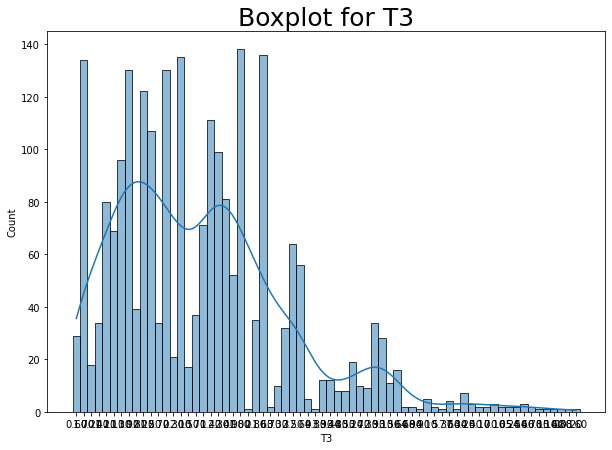

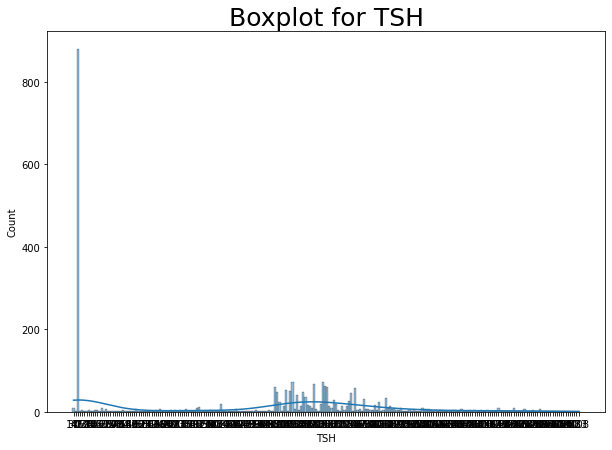

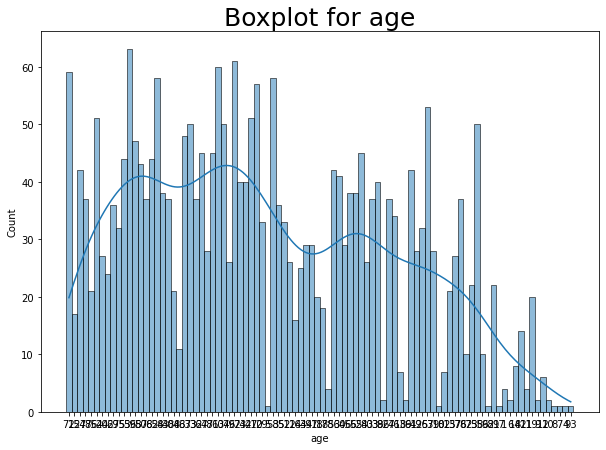

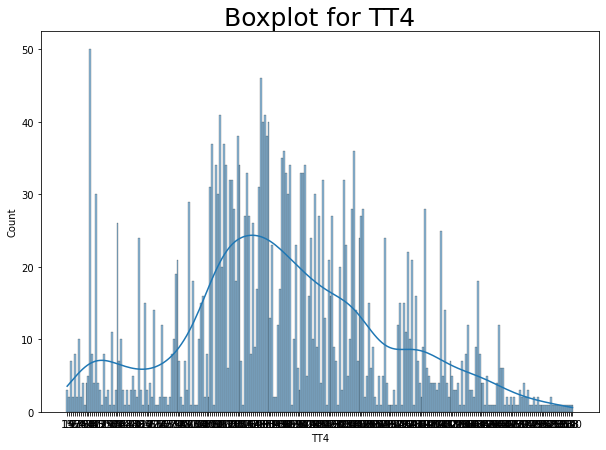

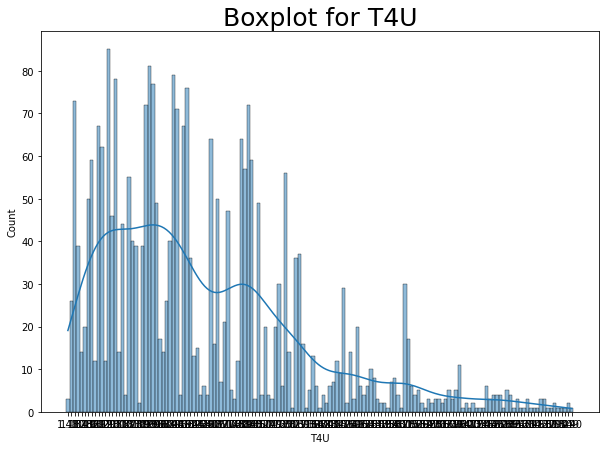

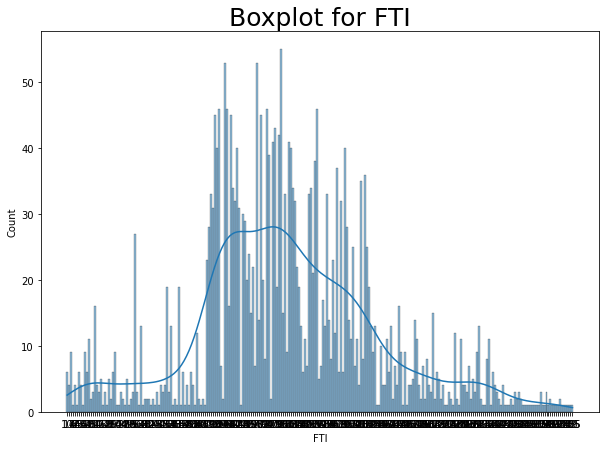

In [21]:
#Histogram of the numerical columns
for i in colz:
    plt.figure(figsize = (10,7))
    sns.histplot(df_clean[i], kde = True)
    plt.title('Boxplot for ' + i, size = 25, color = 'black')
            
plt.show()

The numerical columns are normally distributed, except fot the 'TSH' column which is skewed to the left

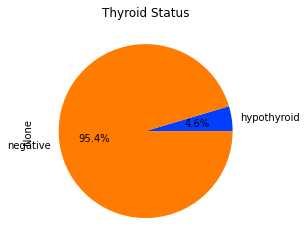

In [22]:
# A pie chart representing the number of positive and negative hypothyroid cases
# Pie chart on thyroid status
pie = df_clean.groupby('status').size()
colors = sns.color_palette('bright')
pie.plot.pie(autopct="%.1f%%", colors = colors)
plt.title('Thyroid Status')
plt.show()

More people tested negative for hypothyroidsm

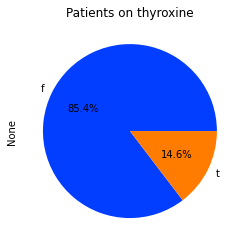

In [23]:
# Pie chart on patients on thyroxine
pie_3= df_clean.groupby('on_thyroxine').size()
colors = sns.color_palette('bright')
pie_3.plot.pie(autopct="%.1f%%", colors= colors)
plt.title('Patients on thyroxine')
plt.show()

More patients were not on thyroine

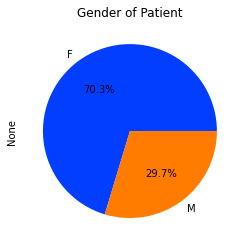

In [24]:
# Pie chart on Gender
colors = sns.color_palette('bright')
pie_2 = df_clean.groupby('sex').size()
pie_2.plot.pie(autopct="%.1f%%", colors= colors)
plt.title('Gender of Patient')
plt.show()


70.3% of the patients with hypothyroidsm are women

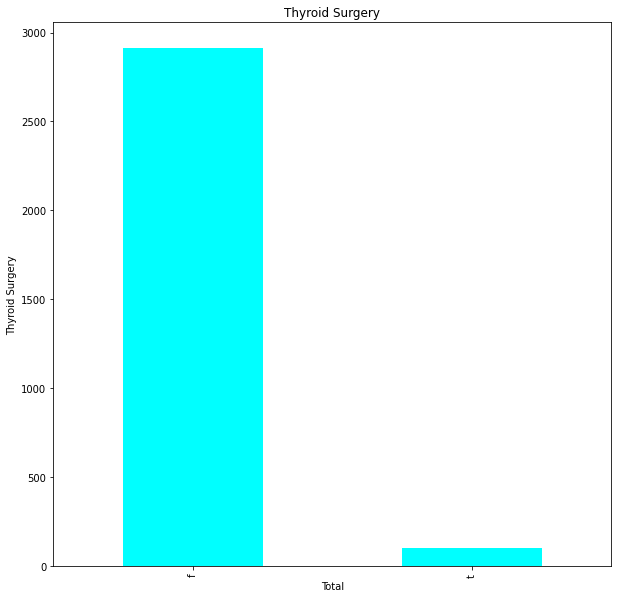

In [25]:
# Bar chart on thyroid surgery
plt.figure(figsize = (10,10))
df_clean.groupby('thyroid_surgery').size().plot(kind='bar', color='aqua')
plt.title('Thyroid Surgery')
plt.ylabel('Thyroid Surgery')
plt.xlabel('Total')
plt.show()

More patients with hypothyroidsm did not have thyroid surgery

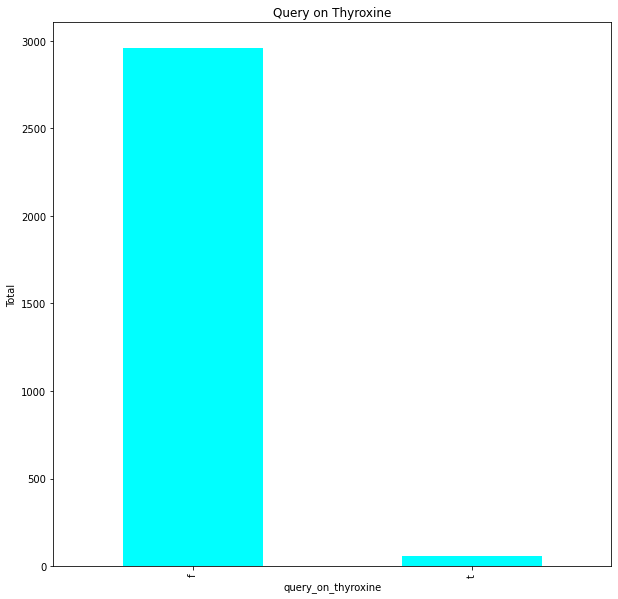

In [26]:
# Bar chart on query on thyroxine
plt.figure(figsize = (10,10))
df_clean.groupby('query_on_thyroxine').size().plot(kind='bar', color='aqua')
plt.title('Query on Thyroxine')
plt.ylabel('Total')
plt.xlabel('query_on_thyroxine')
plt.show()

More patients with hypothyroidsm were not on thyroxine

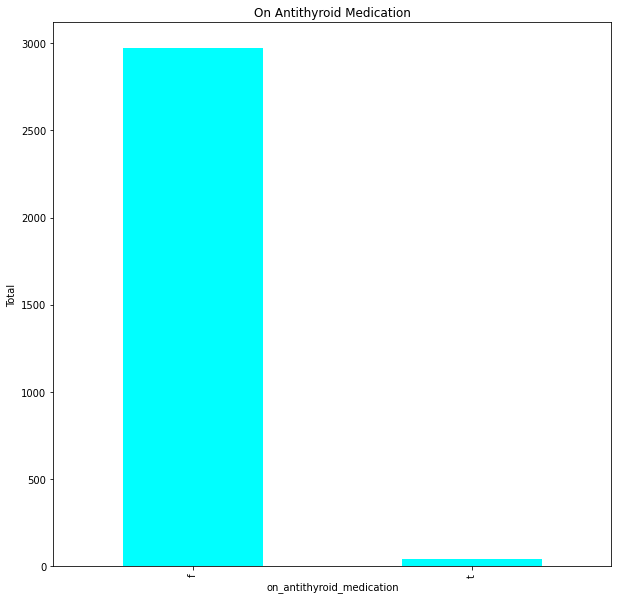

In [27]:
# Bar chart on on antithyroid medication
plt.figure(figsize = (10,10))
df_clean.groupby('on_antithyroid_medication').size().plot(kind='bar', color='aqua')
plt.title('On Antithyroid Medication')
plt.ylabel('Total')
plt.xlabel('on_antithyroid_medication')
plt.show()

More patients with hypothyroidsm were not on Antithyroid medication

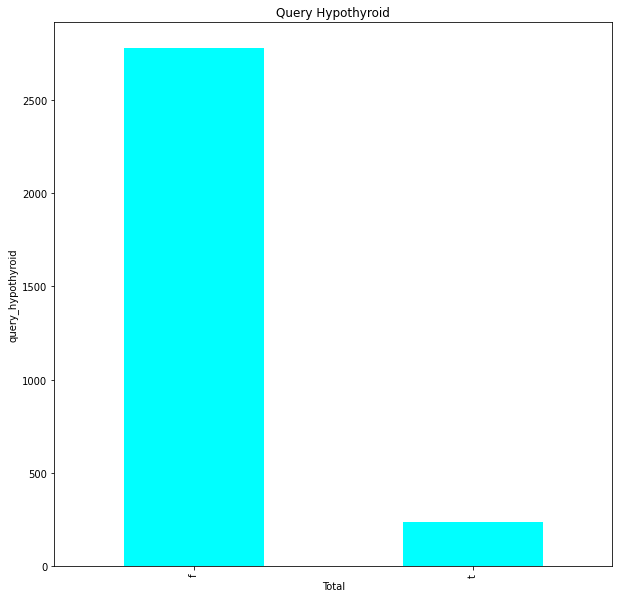

In [28]:
# Bar chart on query hypothyroid
plt.figure(figsize = (10,10))
df_clean.groupby('query_hypothyroid').size().plot(kind='bar', color='aqua')
plt.title('Query Hypothyroid')
plt.ylabel('query_hypothyroid')
plt.xlabel('Total')
plt.show()

More patients did not have hypothyroidsm 

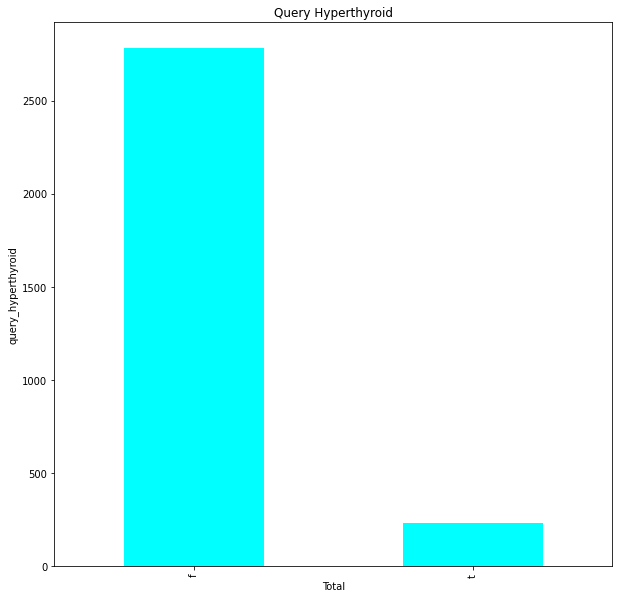

In [29]:
# Bar chart on query hyperthyroid
plt.figure(figsize = (10,10))
df_clean.groupby('query_hyperthyroid').size().plot(kind='bar', color='aqua')
plt.title('Query Hyperthyroid')
plt.ylabel('query_hyperthyroid')
plt.xlabel('Total')
plt.show()

More patients did not have hyperthyroidsm 

In [30]:
#Finding the mean of the numerical columns
df_clean[colz].mean()

Series([], dtype: float64)

In [31]:
#Finding the mode
df_clean[colz].mode()

,T3,TSH,age,TT4,T4U,FTI
0,1.80,0,59,98,0.98,98


In [32]:
#Finding the median
df_clean[colz].median()


T3       1.80
TSH      0.70
age     54.00
TT4    103.00
T4U      0.96
FTI    107.00
dtype: float64

In [33]:
#Finding the upper and lower quantiles
df_clean[colz].quantile([0.25, 0.75])

""
0.25
0.75


In [34]:
#Finding the standard deviation
df_clean[colz].std()

Series([], dtype: float64)

In [35]:
#Finding the variance
df_clean[colz].var()

Series([], dtype: float64)

In [36]:
#Checking the skewness
df_clean[colz].skew()

T3      2.128924
TSH    10.201304
age    -0.173690
TT4     1.493270
T4U     1.261189
FTI     1.533572
dtype: float64

In [37]:
#Checking the kurtosis
df_clean[colz].kurt()

T3      10.868128
TSH    150.664161
age     -0.959866
TT4      7.251887
T4U      3.567022
FTI      8.693313
dtype: float64

# **Bivariate Analysis**

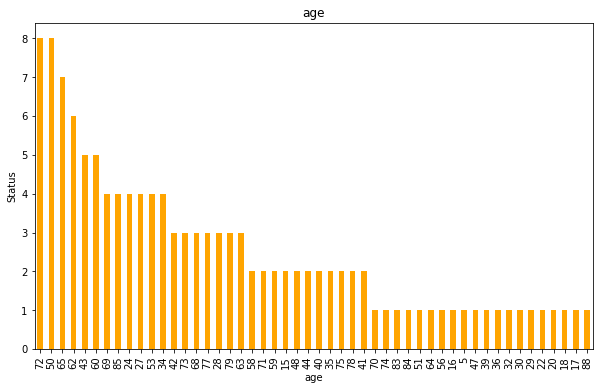

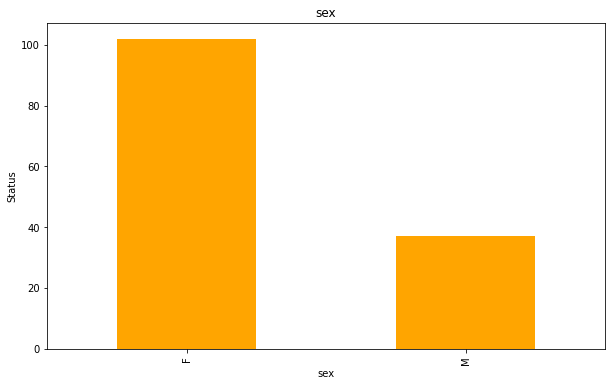

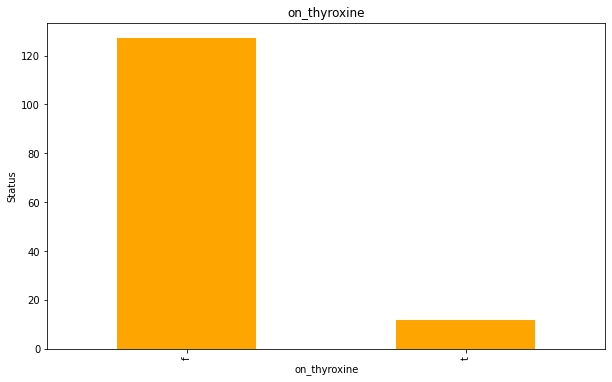

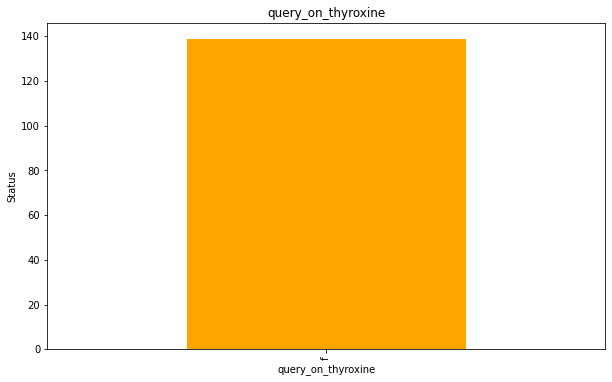

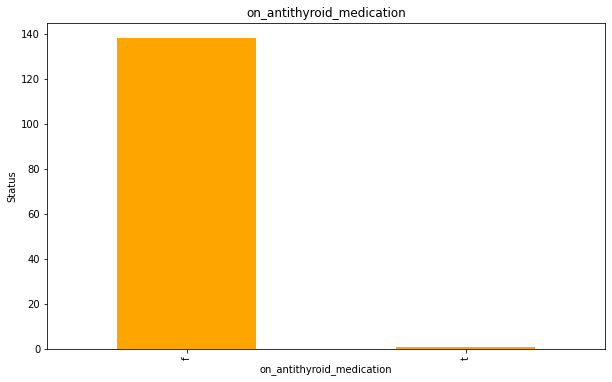

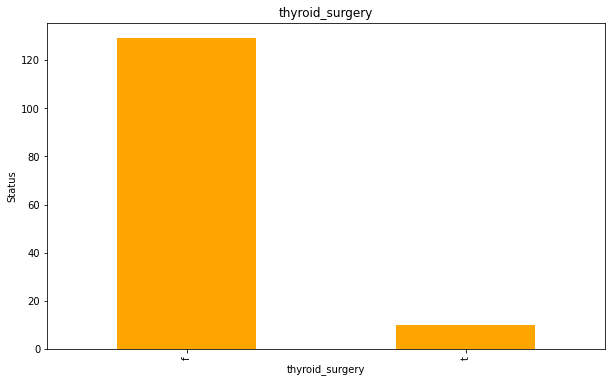

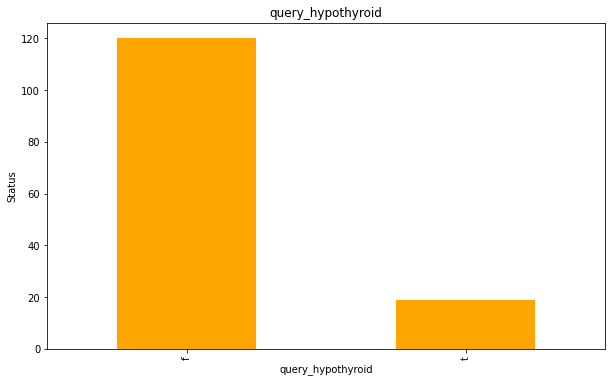

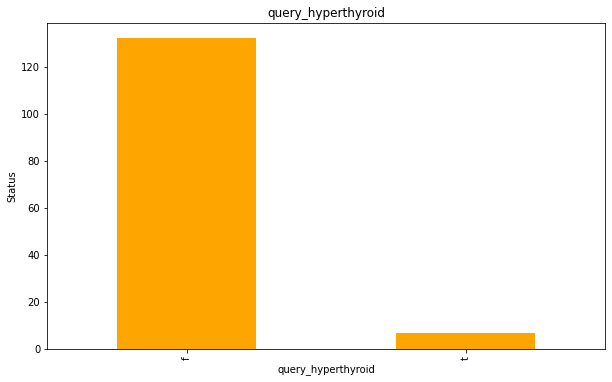

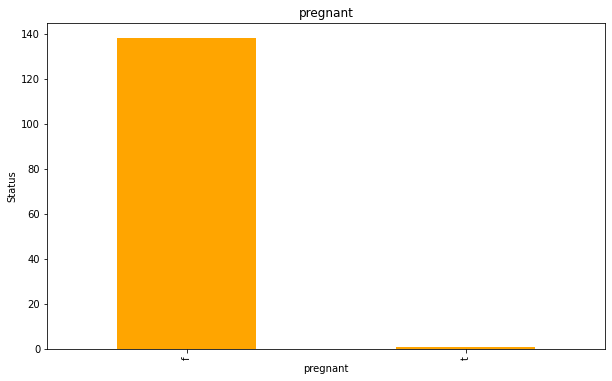

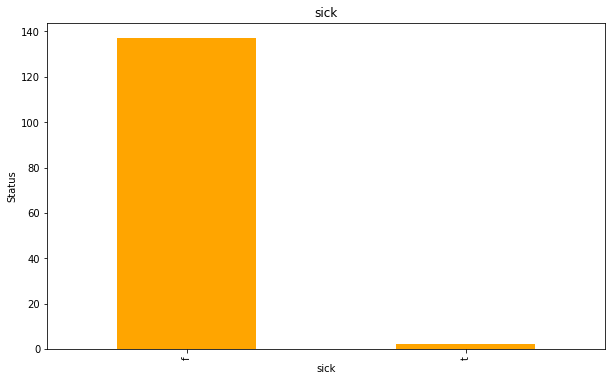

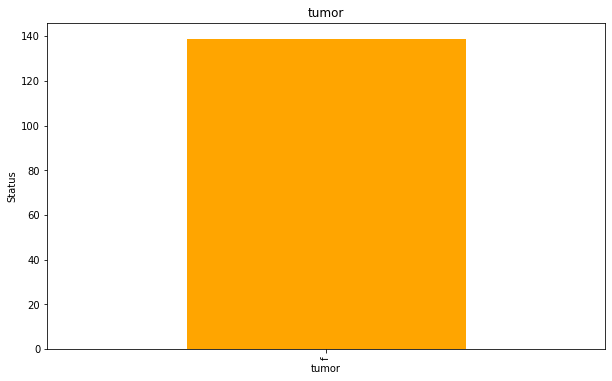

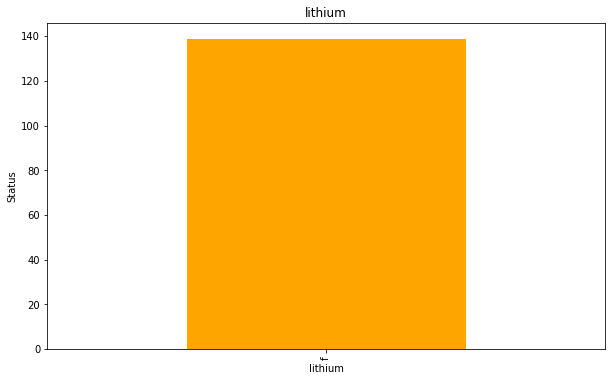

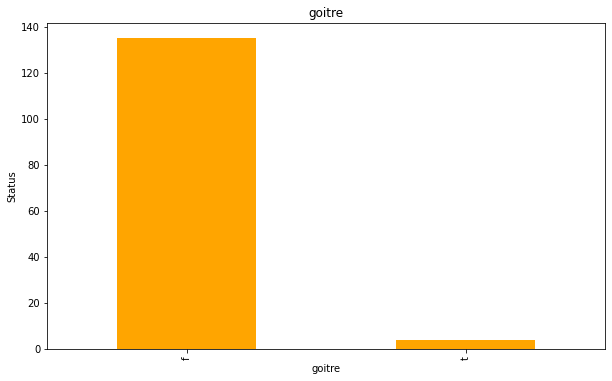

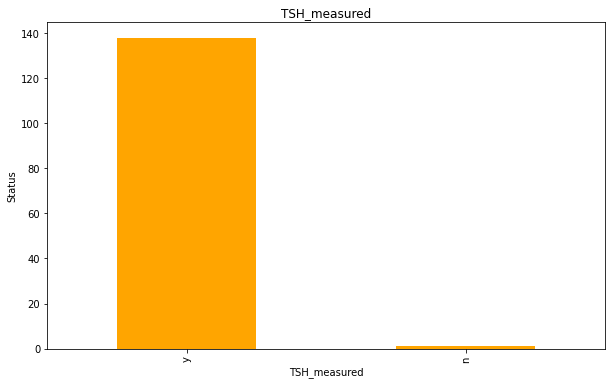

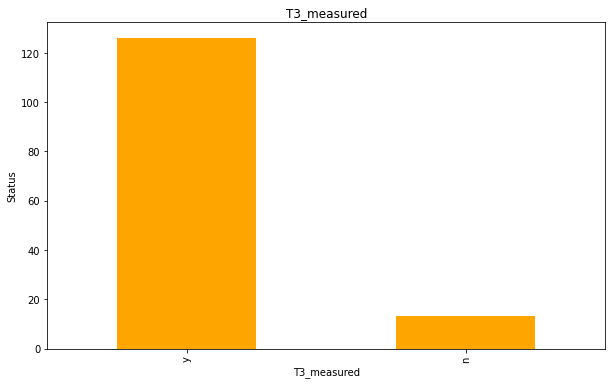

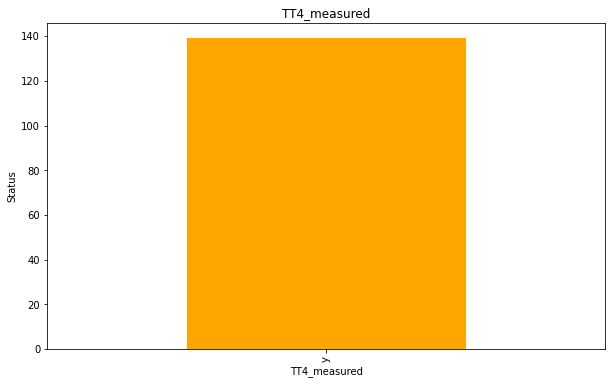

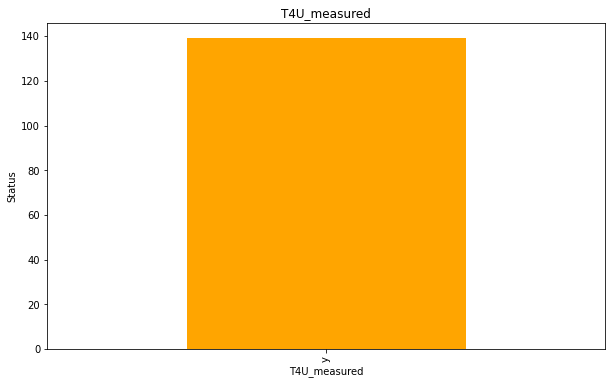

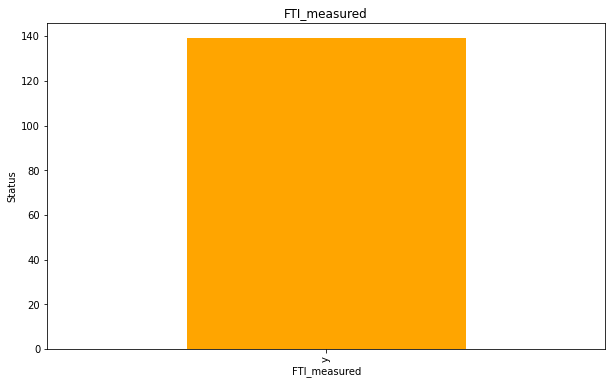

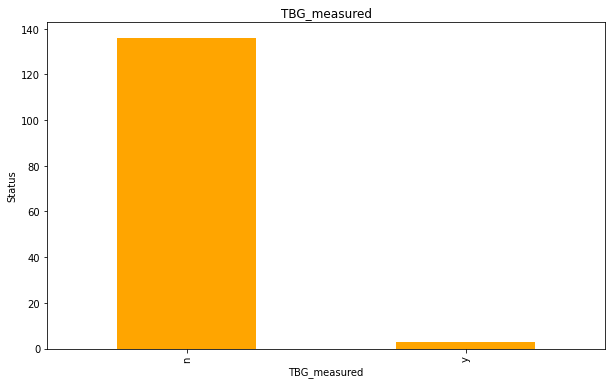

In [38]:
# Assessing the likelihood of getting hypothyroidism depending on our variables 
coll = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
for i in coll:
  positive = df_clean[(df_clean['status']== 'hypothyroid')]
  bar= positive.groupby([i])['status'].size().sort_values(ascending= False)
  bar.plot(kind = 'bar', title= i, ylabel = 'Status' , xlabel = i , figsize =(10,6) , color = 'orange')
  plt.show()

# **Modelling**

In [53]:
#Applying label encoding to our dataset to convert the categorical data to numerical
from sklearn.preprocessing import LabelEncoder
data = df_clean.apply(LabelEncoder().fit_transform)
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,67,1,0,0,0,0,0,0,0,0,0,0,0,1,129,1,7,1,55,1,107,1,2,0
1,0,6,0,1,0,0,0,0,0,0,0,0,0,0,1,74,1,18,1,99,1,72,1,79,0
2,0,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,187,1,59,1,0,0
3,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,153,1,5,1,213,1,63,1,205,0
4,0,72,1,0,0,0,0,0,0,0,0,0,0,0,1,195,1,13,1,210,1,87,1,185,0


# **Random Forest**

In [61]:
#defining the independent and dependent variables
X = data.drop('status',axis=1)
y = data.status

In [63]:
# Import the relevant library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [64]:
# Train using 80% of the data.
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.2, random_state=1)
# Create a Random Forest classifier
forest = RandomForestClassifier()

In [65]:
# Train the Random Forest model 
forest.fit(X_train_forest, y_train_forest)
# Predict based on the model we've trained
y_pred_forest = forest.predict(X_test_forest)

In [66]:
# Check for Model Accuracy
metrics.accuracy_score(y_test_forest, y_pred_forest)

0.9817578772802653

The model is over 98% accurate

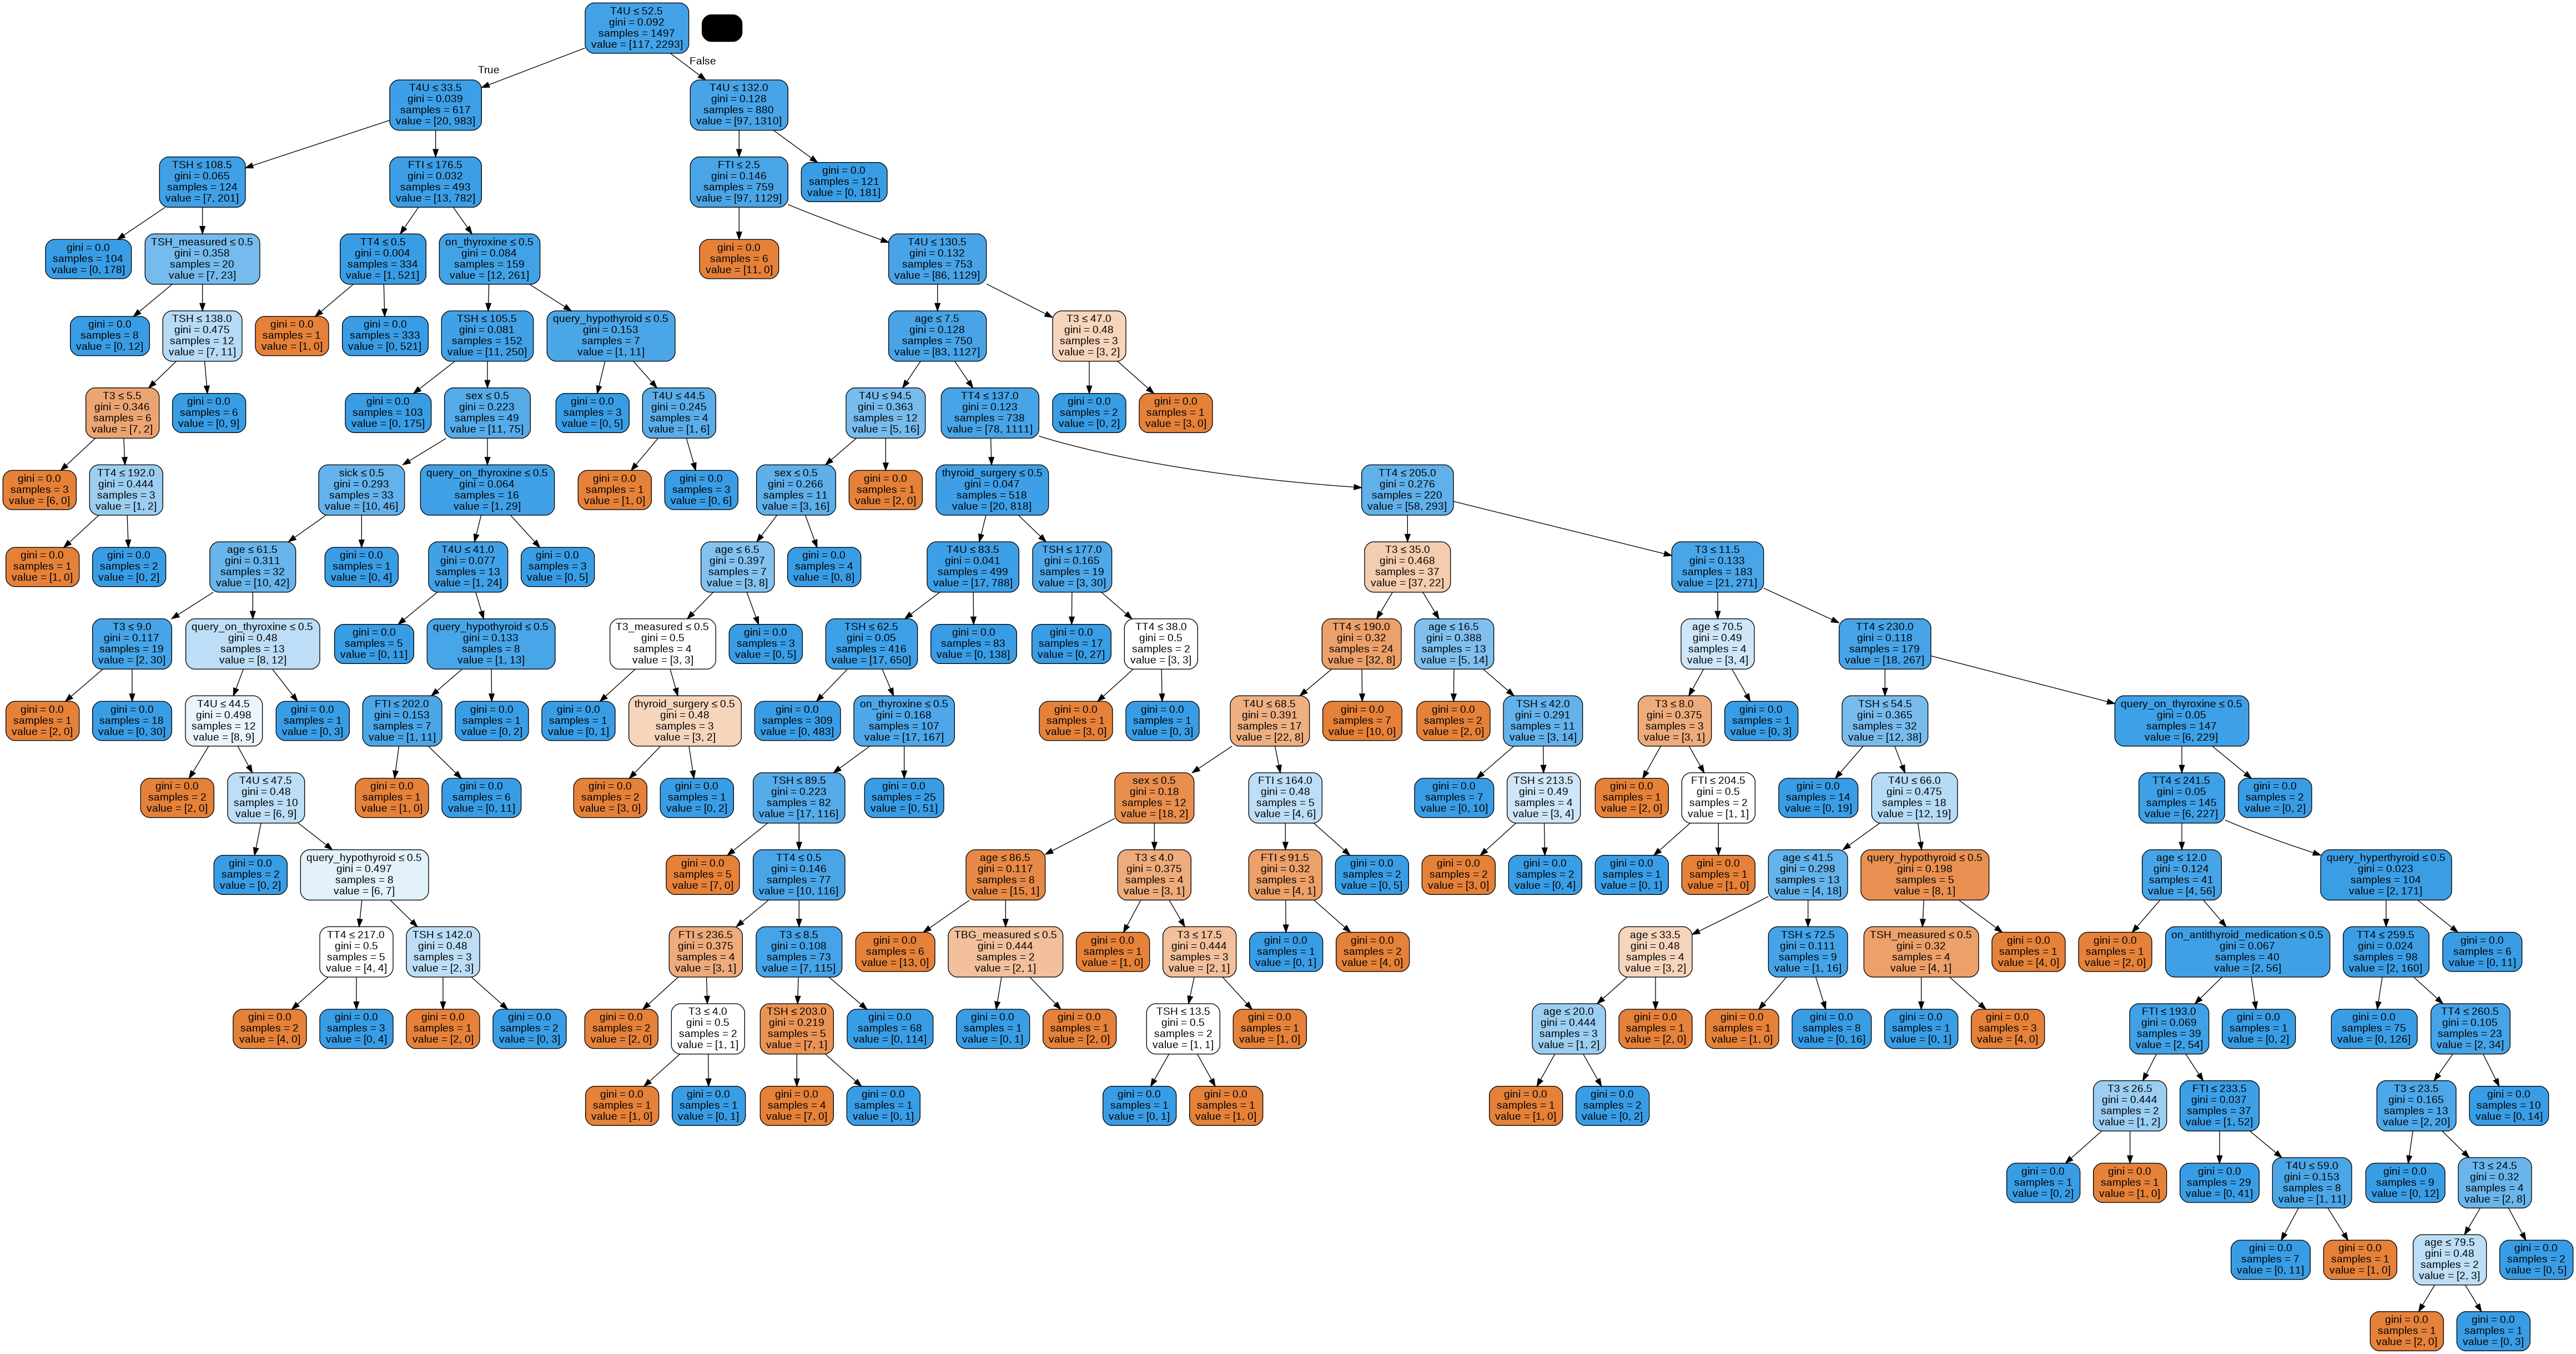

In [67]:
# Visualising the Random Forest
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# pick a specific tree from the forest
tree = forest.estimators_[50]
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('finance.png')
Image(graph.create_png())

In [68]:
# Performing Hyperparameter Tuning 
# We will use Randomized Search CV
# Start by importing the Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Set up our hyperparameters
random_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
    }
random = RandomizedSearchCV(estimator = forest , param_distributions = random_grid, cv = 10, n_jobs = -1, random_state = 1, scoring = 'accuracy')
random.fit(X_train_forest, y_train_forest)
print(random.best_params_)
print(random.best_score_)

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 100}
0.9676348547717841


In [69]:
#A Random Forest classifier with the identified hyperparameters
forest_tune = RandomForestClassifier( n_estimators = 200, min_samples_split = 10, min_samples_leaf = 3, max_features =3,  max_depth = 100)
# Train the Random Forest model 
forest_tune.fit(X_train_forest, y_train_forest)
# Predict based on the model we've trained
y_pred_forest = forest_tune.predict(X_test_forest)
# Model Accuracy
metrics.accuracy_score(y_test_forest, y_pred_forest)

0.9635157545605307

After parameter tuning the model still performs equally as well as the base model

In [72]:
# The second model we will create is a Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting classifier
gb = GradientBoostingClassifier()

In [73]:
# Train our model on our training set
gb.fit(X_train_forest, y_train_forest)

GradientBoostingClassifier()

In [74]:
 # Predict based on our test data
predictions = gb.predict(X_test_forest)
# Model Accuracy
metrics.accuracy_score(y_test_forest, predictions)

0.9800995024875622

This Gradient boosting model performs better than the Random Forest model at a 98% accuracy

it will be chosen over Random Forest,

# **Support Vector Machines**

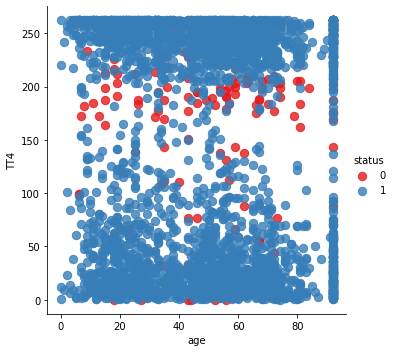

In [75]:
# visualising a relationship between 2 variables 
#using FTI and age as our classifying criteria.
from sklearn.svm import SVC,LinearSVC
sns.lmplot(x='age', y='TT4', data= data , hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [76]:
# Specify the input for the model
X_svc = data[['TT4','age']]
y_svc = data.status

In [78]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_svc = scaler.fit_transform(X_svc)

In [79]:
# Split our data into train and test 
X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(X_svc, y_svc, test_size=0.2, random_state=1)

In [80]:
# linear kernel
# Fit the model
model_svcl = SVC(kernel= 'linear')
model_svcl.fit(X_train_sv,y_train_sv)

SVC(kernel='linear')

In [81]:
# Making predictions
svc_pred = model_svcl.predict(X_test_sv)
# Model Accuracy
metrics.accuracy_score(y_test_sv, svc_pred)

0.9502487562189055

The SVM model is 95% accurate, this model performed well

In [82]:
#using rbf kernel
# Fit the model
model_svcr = SVC(kernel= 'rbf')
model_svcr.fit(X_train_sv,y_train_sv)

SVC()

In [83]:
# Making predictions
svc_pred_rbf = model_svcr.predict(X_test_sv)
# Model Accuracy
metrics.accuracy_score(y_test_sv, svc_pred_rbf)

0.9502487562189055

In [84]:
# polynomial kernel
# Fit the model
model_svcp = SVC(kernel= 'poly')
model_svcp.fit(X_train_sv,y_train_sv)


SVC(kernel='poly')

In [85]:
# Making prediction using test data
svc_pred_poly = model_svcp.predict(X_test_sv)
# Model Accuracy
metrics.accuracy_score(y_test_sv, svc_pred_poly)

0.9502487562189055

In [86]:
# Apply hyperparameters to the polynomial kernel
# Fit the model
model_tune = SVC(kernel= 'poly', C = 0.001, gamma = 1)
model_tune.fit(X_train_sv,y_train_sv)

SVC(C=0.001, gamma=1, kernel='poly')

In [87]:
# Making prediction using test data
pred_poly = model_tune.predict(X_test_sv)
# Model Accuracy
metrics.accuracy_score(y_test_sv, pred_poly)

0.9502487562189055

The model does not improve after hyper parameter tunning

In [88]:
# Add additional features to our model 
y_model = data.status
X_model = data[['TT4','FTI','T3','TSH','age','TSH_measured']]

In [89]:
# Standardizing the data
scaler = StandardScaler()
X_model = scaler.fit_transform(X_model)
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_model, y_model, test_size=0.2, random_state=1)


In [90]:
# Fit the model
model_poly = SVC(kernel= 'poly', C = 0.001, gamma = 1)
model_poly.fit(X_train_model,y_train_model)

SVC(C=0.001, gamma=1, kernel='poly')

In [91]:
# Making prediction using test data
prediction_poly = model_poly.predict(X_test_model)
# Model Accuracy
metrics.accuracy_score(y_test_model, prediction_poly)

0.9502487562189055

The accuracy remains tthe same after adding features

# **Conclusion**

The Random Forests (98% Accuracy) performed better than SVM (95% Accuracy) even after optimization techniques were applied


# **Recommendation**

Implementing the model with the highest accuracy in this case the Random Forests which had a 98% accuracy
